In [ ]:
!pip install duckdb --no-index --find-links=file:///kaggle/input/birdclef24-duckdb-polars/kaggle/working/mysitepackages/duck_pkg

In [ ]:
!pip install polars[numpy,pandas,pyarrow] --no-index --find-links=file:///kaggle/input/birdclef24-duckdb-polars/kaggle/working/mysitepackages/polars_pkg

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import duckdb as dd
import polars as pl
import os
import glob
import shutil
import zipfile
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
!pip install plotly
import plotly.express as px
import librosa
from IPython.display import Audio
import pickle
from joblib import dump, load
from pathlib import Path
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.0
    Uninstalling imbalanced-learn-0.12.0:
      Successfully uninstalled imbalanced-learn-0.12.0


In [3]:
meta_data = pl.read_csv('/kaggle/input/birdclef-2024/train_metadata.csv', low_memory=True)
meta_data.head(5)

primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
str,str,str,f64,f64,str,str,str,str,f64,str,str
"""asbfly""","""[]""","""['call']""",39.2297,118.1987,"""Muscicapa dauu…","""Asian Brown Fl…","""Matt Slaymaker…","""Creative Commo…",5.0,"""https://www.xe…","""asbfly/XC13489…"
"""asbfly""","""[]""","""['song']""",51.403,104.6401,"""Muscicapa dauu…","""Asian Brown Fl…","""Magnus Hellstr…","""Creative Commo…",2.5,"""https://www.xe…","""asbfly/XC16484…"
"""asbfly""","""[]""","""['song']""",36.3319,127.3555,"""Muscicapa dauu…","""Asian Brown Fl…","""Stuart Fisher""","""Creative Commo…",2.5,"""https://www.xe…","""asbfly/XC17579…"
"""asbfly""","""[]""","""['call']""",21.1697,70.6005,"""Muscicapa dauu…","""Asian Brown Fl…","""vir joshi""","""Creative Commo…",4.0,"""https://www.xe…","""asbfly/XC20773…"
"""asbfly""","""[]""","""['call']""",15.5442,73.7733,"""Muscicapa dauu…","""Asian Brown Fl…","""Albert Lastukh…","""Creative Commo…",4.0,"""https://www.xe…","""asbfly/XC20921…"


In [5]:
meta_data.describe()

statistic,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
str,str,str,str,f64,f64,str,str,str,str,f64,str,str
"""count""","""24459""","""24459""","""24459""",24081.0,24081.0,"""24459""","""24459""","""24459""","""24459""",24459.0,"""24459""","""24459"""
"""null_count""","""0""","""0""","""0""",378.0,378.0,"""0""","""0""","""0""","""0""",0.0,"""0""","""0"""
"""mean""",null,null,null,32.53704,43.640699,null,null,null,null,3.843493,null,null
"""std""",null,null,null,19.440382,50.191352,null,null,null,null,1.10084,null,null
"""min""","""asbfly""","""['asbfly']""","""[""'predator sc…",-43.524,-171.7654,"""Accipiter badi…","""Ashy Drongo""",""" Guillermo Tre…","""Creative Commo…",0.0,"""http://xeno-ca…","""asbfly/XC13489…"
"""25%""",null,null,null,17.1601,2.5457,null,null,null,null,3.0,null,null
"""50%""",null,null,null,37.1551,26.6876,null,null,null,null,4.0,null,null
"""75%""",null,null,null,49.1144,85.3193,null,null,null,null,5.0,null,null
"""max""","""zitcis1""","""[]""","""['wings flappi…",71.964,177.4478,"""Yungipicus nan…","""Zitting Cistic…","""飛魚""","""Creative Commo…",5.0,"""https://xeno-c…","""zitcis1/XC8585…"


In [6]:
fig = px.scatter_mapbox(meta_data, lat='latitude', lon='longitude', color='common_name', 
                        hover_name='common_name', hover_data=['latitude', 'longitude'], 
                        title='Origin of Bird Species',
                        zoom=1, height=600, template='plotly_dark')
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [7]:
def audio_waveframe(file_path):
    # Load the audio file
    audio_data, sampling_rate = librosa.load(file_path)
    # Calculate the duration of the audio file
    duration = len(audio_data) / sampling_rate
    # Create a time array for plotting
    time = np.arange(0, duration, 1/sampling_rate)
    # Plot the waveform
    plt.figure(figsize=(30, 4))
    plt.plot(time, audio_data, color='blue')
    plt.title('Audio Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plot = plt.show()
    return plot

def spectrogram(file_path):
    # Compute the short-time Fourier transform (STFT)
    n_fft = 500  # Number of FFT points 2048
    hop_length = 50  # Hop length for STFT 512
    audio_data, sampling_rate = librosa.load(file_path)
    stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
    # Convert the magnitude spectrogram to decibels (log scale)
    spectrogram = librosa.amplitude_to_db(np.abs(stft))
    # Plot the spectrogram
    plt.figure(figsize=(30, 6))
    librosa.display.specshow(spectrogram, sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plot = plt.show()
    return plot

def audio_analysis(file_path):
    aw = audio_waveframe(file_path)
    spg = spectrogram(file_path)
    return aw, spg

In [28]:
meta_data.filter((pl.col('primary_label')=='redspu1') & (pl.col('filename')=='redspu1/XC325427.ogg'))\
.select('type','latitude','longitude','common_name','rating')

type,latitude,longitude,common_name,rating
str,f64,f64,str,f64
"""['call', 'male…",15.8657,74.0592,"""Red Spurfowl""",4.0


#### Possibility of a feature with the type of recording, latitude & longitude
#### the rating can be used as a weight

In [29]:
meta_data.filter((pl.col('primary_label')=='redspu1') & (pl.col('filename')=='redspu1/XC325427.ogg')).select('type')

type
str
"""['call', 'male…"


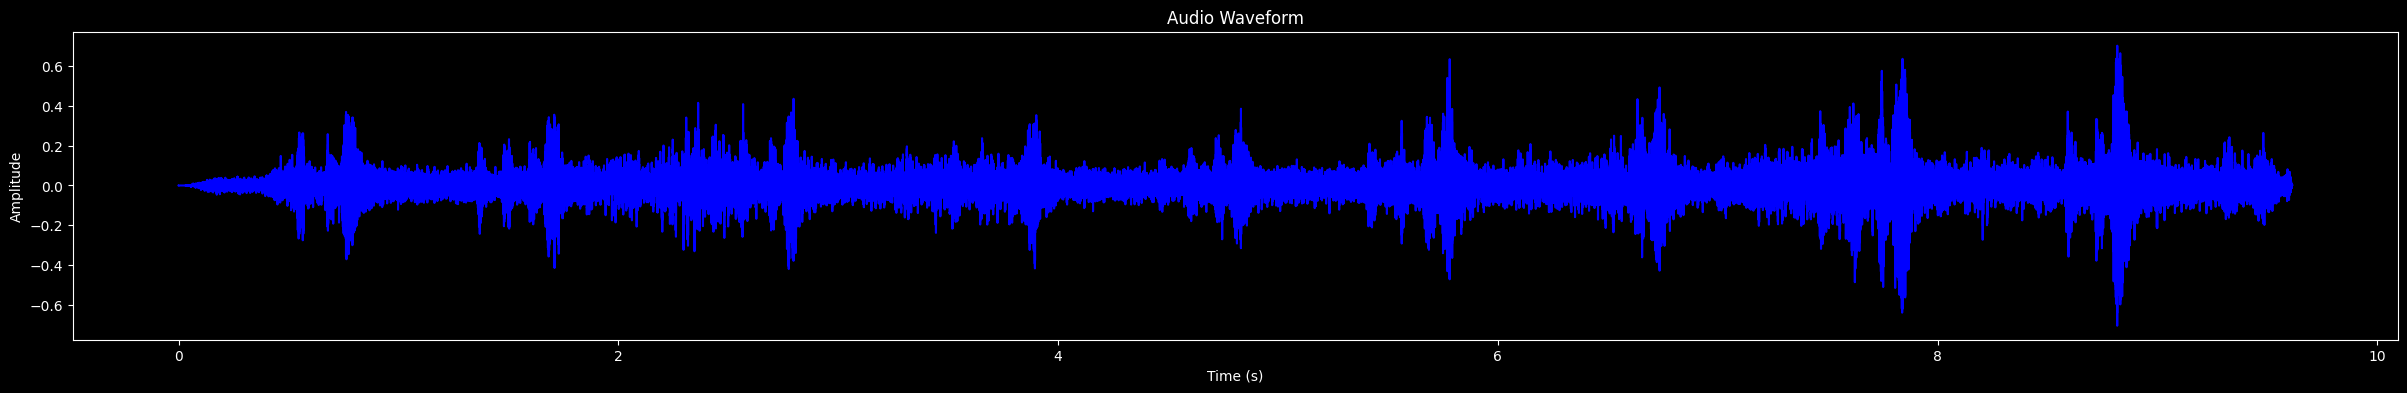

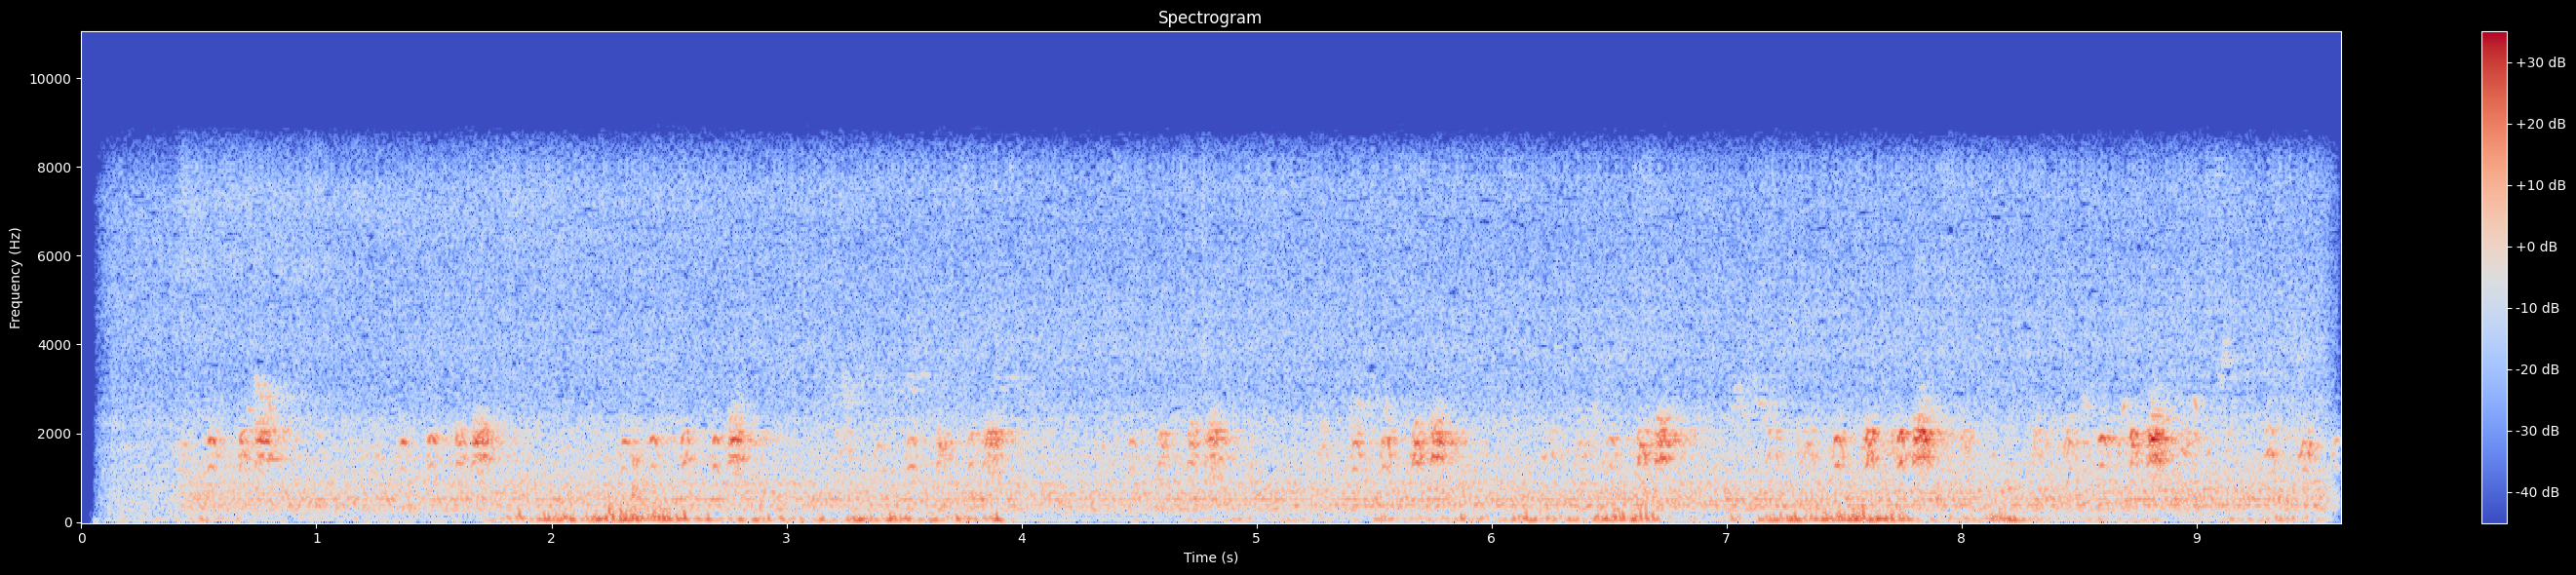

In [24]:
audio_analysis('/kaggle/input/birdclef-2024/train_audio/redspu1/XC325427.ogg')
Audio('/kaggle/input/birdclef-2024/train_audio/redspu1/XC325427.ogg')

In [22]:
audio_data, sampling_rate = librosa.load('/kaggle/input/birdclef-2024/train_audio/redspu1/XC325427.ogg')
print(sampling_rate)

22050


In [23]:
duration = librosa.get_duration(y=audio_data, sr=sampling_rate)
duration

9.613015873015874

In [18]:
# Path to the directory containing your audio dataset
dataset_dir = '/kaggle/input/birdclef-2024/train_audio'
# Initialize an empty dictionary to store the mapping between audio files and labels
label_mapping = {}
# Iterate over subdirectories (classes) in the dataset directory
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    # Check if the item in the dataset directory is a directory
    if os.path.isdir(label_dir):
        # Iterate over audio files in the subdirectory (class)
        for audio_file in os.listdir(label_dir):
            # Add the mapping between audio file path and label to the dictionary
            audio_file_path = os.path.join(label_dir, audio_file)
            label_mapping[audio_file_path] = label
            
# label_mapping

# Create a list of tuples containing the audio file paths and labels
data = [(audio_file_path, label) for audio_file_path, label in label_mapping.items()]
# Create a Pandas DataFrame from the list of tuples
annotated_data = pd.DataFrame(data, columns=['audio_file_path', 'label'])

annotated_data.head(10)

,audio_file_path,label
0,/kaggle/input/birdclef-2024/train_audio/redspu...,redspu1
1,/kaggle/input/birdclef-2024/train_audio/redspu...,redspu1
2,/kaggle/input/birdclef-2024/train_audio/redspu...,redspu1
3,/kaggle/input/birdclef-2024/train_audio/redspu...,redspu1
4,/kaggle/input/birdclef-2024/train_audio/redspu...,redspu1
5,/kaggle/input/birdclef-2024/train_audio/redspu...,redspu1
6,/kaggle/input/birdclef-2024/train_audio/redspu...,redspu1
7,/kaggle/input/birdclef-2024/train_audio/redspu...,redspu1
8,/kaggle/input/birdclef-2024/train_audio/redspu...,redspu1
9,/kaggle/input/birdclef-2024/train_audio/redspu...,redspu1


In [31]:
print(annotated_data['audio_file_path'].iloc[10])
print(annotated_data['label'].iloc[10])

/kaggle/input/birdclef-2024/train_audio/redspu1/XC325427.ogg
redspu1


In [21]:
annotated_data.shape[0]

24459

In [30]:
# Function to extract features from audio file
def extract_features(file_path):
    # Load audio file
    audio, sample_rate = librosa.load(file_path)
    # Extract features using Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # Flatten the features into a 1D array
    flattened_features = np.mean(mfccs.T, axis=0)
    return flattened_features

In [33]:
def load_data_and_extract_features():
    labels = []
    features = []
    # Loop through each audio file in the dataset directory
    for i in range(annotated_data.shape[0]):
        labels.append(annotated_data['label'].iloc[i])
        features.append(extract_features(annotated_data['audio_file_path'].iloc[i]))
    
    return np.array(features), np.array(labels)

In [34]:
extracted_features, labels = load_data_and_extract_features()

# for i in tqdm(annotated_data['audio_file_path']):
#     features = extract_features(file_path=i)
#     # print(features)
#     extracted_features.append(features)

In [35]:
with open("extracted_features", "wb") as file:   #Pickling
    pickle.dump(extracted_features, file)

In [ ]:
sample_submission = pl.read_csv('/kaggle/input/birdclef-2024/sample_submission.csv', low_memory=True)
print(sample_submission.shape)
sample_submission.head(10)

In [ ]:
sample_submission2 = sample_submission.drop("row_id")
sample_submission2.sum_horizontal()

In [ ]:
print(np.array(sample_submission2)[2].shape)
print(np.array(sample_submission2).shape)

In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True, as_frame=False)
print(X.shape)
print(type(y))
print(X.shape)
print(y.shape)
print(X[2])
print(y[2])
print(y[[10, 25, 50]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear").fit(X, y)
print(clf.predict_proba(X).shape)
print(clf.predict_proba(X)[4].shape)

In [ ]:
sample_labels = [i for i in range(0, 182, 1)]
len(sample_labels)

In [ ]:
y_true_sample = np.array([0,1,2])
roc_auc_score(y_true_sample, sample_submission2, multi_class='ovo', average='macro', labels=sample_labels)

In [ ]:
roc_auc_score(y_true_sample, sample_submission2, multi_class='ovr', average='micro', labels=sample_labels)